In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('file:///F:/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.shape

(21613, 21)

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.price.max()

7700000.0

In [6]:
df.price.min()

75000.0

In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

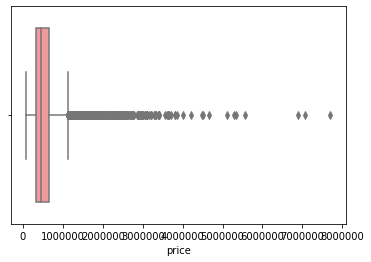

In [8]:
sns.boxplot(df['price'],color = '#ff8c8e')

In [9]:
df = df[df['price'] < 1000000]

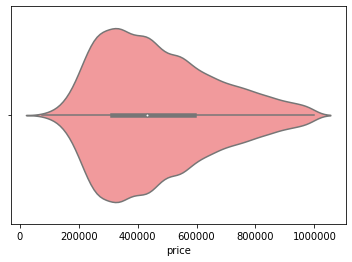

In [10]:

sns.violinplot(df['price'],color='#ff8c8e')


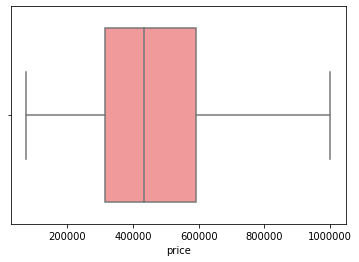

In [11]:
sns.boxplot(df['price'],color = '#ff8c8e')

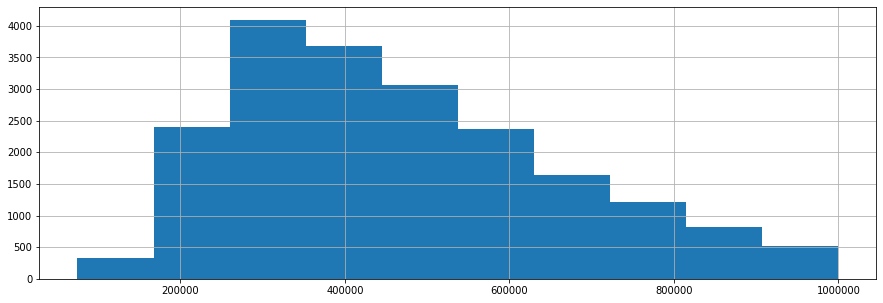

In [12]:
df['price'].hist(figsize=(15,5))
plt.show()

In [13]:
df['age'] = [2015 - x[0] if x[1]==0 else 2015 - x[1] for x in df[['yr_built','yr_renovated']].values]

# Display the result
df[['yr_built','yr_renovated','age']].head()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,yr_built,yr_renovated,age
0,1955,0,60
1,1951,1991,24
2,1933,0,82
3,1965,0,50
4,1987,0,28


In [14]:
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement','sqft_living15', 'sqft_lot15', 'age']

df = df[cols]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,60
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,24
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,50
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28


In [15]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,60
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,24
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,50
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,1530,1509,6
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,1830,7200,1
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,1020,2007,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,1410,1287,11


In [16]:
x=df.drop(['price'],axis=1)
y=df.price.values

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [18]:
scaler = StandardScaler()

In [19]:
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

In [20]:
xtrain

array([[ 0.73213157,  0.65005339, -0.06069743, ...,  1.13945648,
        -0.11591294,  0.34827273],
       [ 0.73213157,  0.65005339,  1.03857776, ...,  1.25606962,
        -0.15339367,  0.41832369],
       [ 0.73213157,  0.65005339,  0.09823392, ...,  0.31483501,
        -0.25696867, -1.08777191],
       ...,
       [ 0.73213157,  0.65005339,  2.00541016, ...,  3.15519785,
         0.84886207, -0.7725426 ],
       [-0.35258766, -1.47341916, -1.01428555, ..., -0.90960293,
        -0.0840953 , -0.28218589],
       [-1.43730689, -0.76559498, -1.14672834, ..., -1.32607842,
        -0.41031927, -1.22787383]])

In [21]:
ytrain[:2]

array([333000., 625000.])

In [22]:
li=LinearRegression()
li.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
li.score(xtest,ytest)

0.5530332905159624

In [24]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,60
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,24
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,50
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,1530,1509,6
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,1830,7200,1
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,1020,2007,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,1410,1287,11


In [25]:
a=df.floors.values
b=df.price.values

In [26]:
a=a.reshape(-1,1)

In [27]:
b=b.reshape(-1,1)

In [28]:
a.shape

(20121, 1)

In [29]:
b.shape

(20121, 1)

In [30]:
atrain,atest,btrain,btest=train_test_split(a,b,test_size=0.3)

In [31]:
atest.shape

(6037, 1)

In [32]:
btest.shape

(6037, 1)

In [33]:
li=LinearRegression()
li.fit(atrain,btrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
li.score(atest,btest)

0.062470054103804906

In [35]:
tre=DecisionTreeClassifier()
tre.fit(atrain,btrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
tre.score(atest,btest)

0.006957097896306112

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
mnb=MultinomialNB()
mnb.fit(atrain,btrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [39]:
mnb.score(atest,btest)

0.008282259400364419

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
gnb=GaussianNB()
gnb.fit(atrain,btrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
gnb.score(atest,btest)

0.00016564518800728838

In [43]:
from sklearn.naive_bayes import BernoulliNB

In [44]:
ber=BernoulliNB()
ber.fit(atrain,btrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [45]:
ber.score(atest,btest)

0.008282259400364419

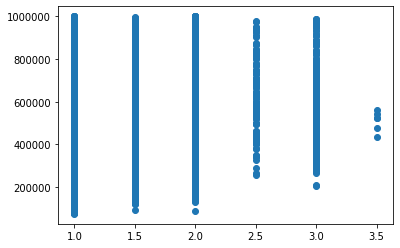

In [48]:
plt.scatter(df[['floors']],df['price'])

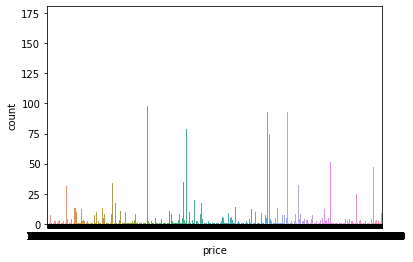

In [49]:
sns.countplot(df['price'])

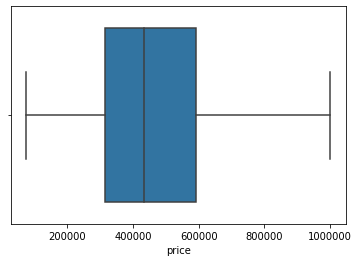

In [51]:
sns.boxplot(df['price'])

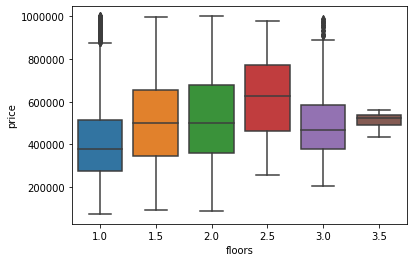

In [52]:
sns.boxplot(x='floors',y='price',data=df)

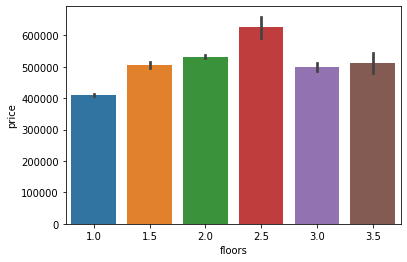

In [55]:
sns.barplot(x='floors',y='price',data=df)

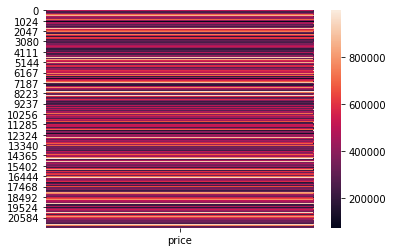

In [57]:
sns.heatmap(df[['price']])

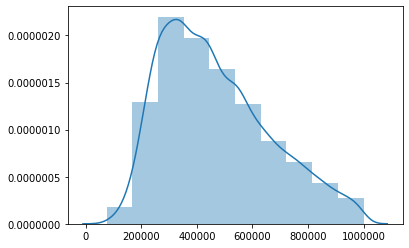

In [59]:
sns.distplot(df[['price']],bins=10)

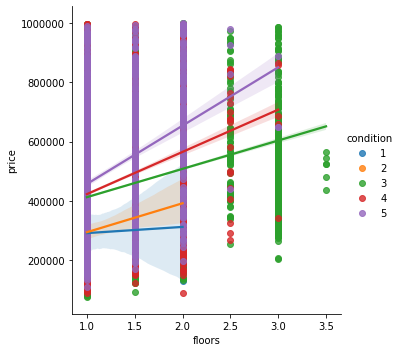

In [61]:
sns.lmplot(x='floors',y='price',data=df,hue='condition')

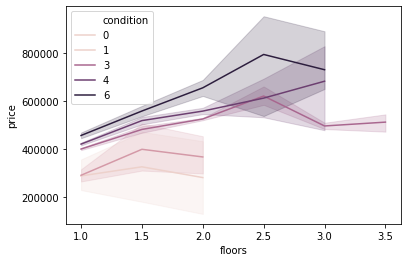

In [62]:
sns.lineplot(x='floors',y='price',data=df,hue='condition')

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


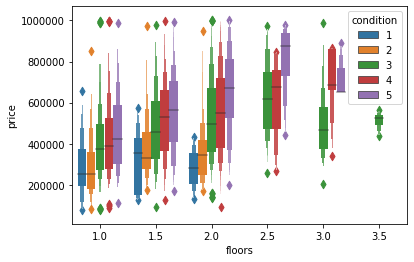

In [69]:
sns.lvplot(x='floors',y='price',data=df,hue='condition')

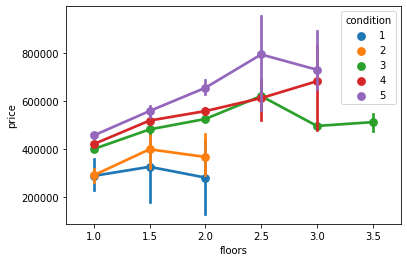

In [64]:
sns.pointplot(x='floors',y='price',data=df,hue='condition')

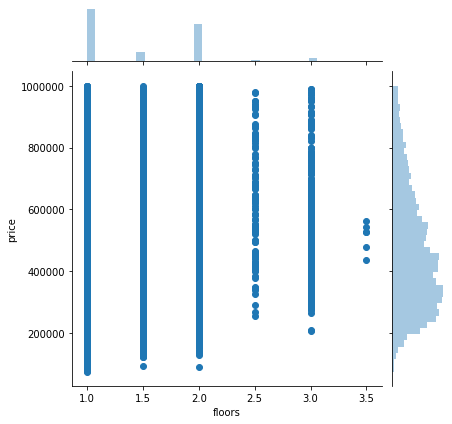

In [71]:
sns.jointplot(x='floors',y='price',data=df)

In [73]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,60
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,24
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,50
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,1530,1509,6
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,1830,7200,1
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,1020,2007,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,1410,1287,11


In [74]:
import sweetviz as sv

In [75]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [76]:
from IPython.display import IFrame

In [77]:
IFrame(src='Analyze.html',width=1000,height=600)

In [80]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age
price,1.000000,0.288473,0.440117,0.604508,0.094603,0.268906,0.051189,0.212249,0.031659,0.616887,0.515809,0.222108,0.549315,0.082331,-0.096904
bedrooms,0.288473,1.000000,0.489321,0.586623,0.023742,0.150454,-0.032110,0.030215,0.025426,0.315959,0.463223,0.281277,0.368915,0.020139,-0.164821
bathrooms,0.440117,0.489321,1.000000,0.711558,0.061655,0.501471,-0.009145,0.081816,-0.139683,0.606310,0.632748,0.216356,0.520940,0.061524,-0.570097
sqft_living,0.604508,0.586623,0.711558,1.000000,0.156754,0.336249,0.002360,0.150829,-0.075045,0.693526,0.850019,0.373147,0.731735,0.170431,-0.369115
sqft_lot,0.094603,0.023742,0.061655,0.156754,1.000000,-0.018675,0.026310,0.082079,-0.002264,0.089542,0.159095,0.012960,0.140941,0.706291,-0.042114
floors,0.268906,0.150454,0.501471,0.336249,-0.018675,1.000000,-0.005733,-0.016930,-0.279211,0.456696,0.527958,-0.301013,0.266799,-0.022984,-0.526224
waterfront,0.051189,-0.032110,-0.009145,0.002360,0.026310,-0.005733,1.000000,0.301291,0.013720,-0.013840,-0.006031,0.015036,0.002900,0.032954,0.023564
view,0.212249,0.030215,0.081816,0.150829,0.082079,-0.016930,0.301291,1.000000,0.029158,0.116783,0.055976,0.183503,0.169388,0.078421,0.046242
condition,0.031659,0.025426,-0.139683,-0.075045,-0.002264,-0.279211,0.013720,0.029158,1.000000,-0.172170,-0.179907,0.176515,-0.122936,0.002905,0.382108
grade,0.616887,0.315959,0.606310,0.693526,0.089542,0.456696,-0.013840,0.116783,-0.172170,1.000000,0.699876,0.064399,0.661675,0.098763,-0.499584


In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'age'],
      dtype='object')

In [84]:
scal=MinMaxScaler()
feat=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'age']
df[feat]=scal.fit_transform(df[feat])
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age
0,0.158811,0.090909,0.133333,0.123783,0.003108,0.0,0.0,0.0,0.5,0.545455,0.164207,0.000000,0.206768,0.005742,0.521739
1,0.500541,0.090909,0.300000,0.317107,0.004072,0.4,0.0,0.0,0.5,0.545455,0.346863,0.147059,0.283674,0.008027,0.208696
2,0.113514,0.060606,0.133333,0.066759,0.005743,0.0,0.0,0.0,0.5,0.454545,0.088561,0.000000,0.509998,0.008513,0.713043
3,0.571893,0.121212,0.400000,0.232267,0.002714,0.0,0.0,0.0,1.0,0.545455,0.140221,0.334559,0.211162,0.004996,0.434783
4,0.470271,0.090909,0.266667,0.193324,0.004579,0.0,0.0,0.0,0.5,0.636364,0.256458,0.000000,0.307844,0.007871,0.243478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.308108,0.090909,0.333333,0.172462,0.000370,0.8,0.0,0.0,0.5,0.636364,0.228782,0.000000,0.248517,0.000986,0.052174
21609,0.351352,0.121212,0.333333,0.280946,0.003206,0.4,0.0,0.0,0.5,0.636364,0.372694,0.000000,0.314436,0.007523,0.008696
21610,0.353623,0.060606,0.100000,0.101530,0.000503,0.4,0.0,0.0,0.5,0.545455,0.134686,0.000000,0.136454,0.001558,0.052174
21611,0.351352,0.090909,0.333333,0.182197,0.001132,0.4,0.0,0.0,0.5,0.636364,0.241697,0.000000,0.222149,0.000731,0.095652


In [85]:
pd.crosstab(df.floors,df.price)

price,0.000000,0.003243,0.005405,0.006486,0.007568,0.008108,0.008649,0.009730,0.010811,0.012432,...,0.995677,0.996758,0.997785,0.997839,0.998012,0.998379,0.998704,0.998920,0.999947,1.000000
floors,,,,,,,,,,,,,,,,,,,,,
0.0,1,1,1,1,1,1,1,1,2,1,...,0,0,0,0,1,0,1,3,0,0
0.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
0.4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,9,0,1,0,3,2,1
0.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
std=StandardScaler()
feat=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'age']
df[feat]=std.fit_transform(df[feat])
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age
0,-1.253536,-0.351014,-1.476028,-1.024832,-0.221581,-0.878164,-0.053767,-0.26132,-0.626266,-0.495522,-0.719177,-0.650041,-0.945254,-0.254582,0.623384
1,0.363210,-0.351014,0.302024,0.816079,-0.181779,0.986400,-0.053767,-0.26132,-0.626266,-0.495522,0.673105,0.340761,-0.362255,-0.179397,-0.635673
2,-1.467841,-1.449422,-1.476028,-1.567834,-0.112825,-0.878164,-0.053767,-0.26132,-0.626266,-1.482006,-1.295779,-0.650041,1.353426,-0.163408,1.392808
3,0.700778,0.747393,1.368855,0.008197,-0.237832,-0.878164,-0.053767,-0.26132,2.472112,-0.495522,-0.902002,1.604032,-0.911939,-0.279152,0.273646
4,0.219999,-0.351014,-0.053586,-0.362634,-0.160828,-0.878164,-0.053767,-0.26132,-0.626266,0.490962,-0.016005,-0.650041,-0.179027,-0.184538,-0.495778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.547201,-0.351014,0.657635,-0.561293,-0.334562,2.850965,-0.053767,-0.26132,-0.626266,0.490962,-0.226956,-0.650041,-0.628769,-0.411113,-1.265202
21609,-0.342614,0.747393,0.657635,0.471736,-0.217506,0.986400,-0.053767,-0.26132,-0.626266,0.490962,0.869993,-0.650041,-0.129056,-0.195992,-1.440071
21610,-0.331868,-1.449422,-1.831639,-1.236735,-0.329086,0.986400,-0.053767,-0.26132,-0.626266,-0.495522,-0.944192,-0.650041,-1.478281,-0.392288,-1.265202
21611,-0.342614,-0.351014,0.657635,-0.468585,-0.303135,0.986400,-0.053767,-0.26132,-0.626266,0.490962,-0.128512,-0.650041,-0.828654,-0.419504,-1.090333
